In [25]:
from dotenv import load_dotenv
import os

load_dotenv(verbose=True)
key = os.getenv('OPENAI_API_KEY')

In [26]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [27]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [28]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    api_key=key, 
    model_name='gpt-4o-mini',
    temperature=0.1
)

In [29]:
def chatbot(state: State):
    answer = llm.invoke(state['messages'])

    print('===================' * 20)
    print('1.chatbot() 실행')
    print(f"2.state[messages]: {state['messages']}")
    print('3.chatbot answer:', answer)
    print('4.chatbot answer:', answer.content)
    print('===================' * 20)

    return {'messages': [answer]}

In [30]:
graph_builder = StateGraph(State)

In [31]:
graph_builder.add_node('chatbot', chatbot)      # 노드(함수) 이름을 인자로 받아서 chatbot 노드를 추가

In [32]:
graph_builder.add_edge(START, 'chatbot')        # 시작 노드에서 챗봇 노드(chatbot)로의 엣지 추가

In [33]:
graph_builder.add_edge('chatbot', END)          # chatbot 노드에서 END 노드로 엣지 추가

In [34]:
graph = graph_builder.compile()                 # 그래프 컴파일

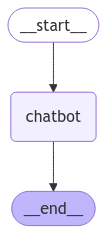

In [35]:
from IPython.display import Image, display      # 그래프 시각화

display(Image(graph.get_graph().draw_mermaid_png()))

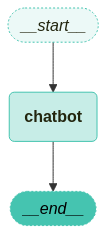

In [36]:
from langchain_teddynote.graphs import visualize_graph

visualize_graph(graph)

In [37]:
question = '대한민국 계엄령에 대해서 알려줘'

In [38]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')
    print(event)
    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='6c39ba22-36df-42a4-b693-dc1a3fcb942b')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 법률의 일부 또는 전부를 정지시키는 제도입니다. 계엄령은 주로 전쟁, 내란, 대규모 폭동 등의 비상사태에 대응하기 위해 선포됩니다.\n\n대한민국 역사에서 계엄령은 여러 차례 선포되었습니다. 가장 유명한 사례는 1960년대와 1980년대의 정치적 혼란과 관련이 있습니다.\n\n1. **1960년 4.19 혁명 이후**: 이승만 정부의 부정선거에 대한 반발로 일어난 4.19 혁명 이후, 이승만 대통령은 계엄령을 선포하고 군대를 동원하여 시위를 진압하려 했습니다. 그러나 결국 이승만은 하야하게 되었습니다.\n\n2. **1980년 광주 민주화 운동**: 1980년 5월, 전두환 군부가 권력을 잡으면서 계엄령을 선포했습니다. 이 과정에서 광주에서 발생한 민주화 운동은 군의 강경 진압으로 이어졌고, 많은 인명 피해가 발생했습니다. 이 사건은 한국 현대사에서 중요한 전환점으로 여겨지며, 이후 민주화 운동의 기폭제가 되었습니다.\n\n계엄령은 헌법에 의해 규정되어 있으며, 대통령이 선포할 수 있습니다. 그러나 계엄령의 남용은 민주주의와 인권에 대한 심각한 위협이 될 수 있기 때문에, 그 필요성과 정당성에 대한 논란이 항상 존재합니다. \n\n현재 대한민국에서는 계엄령의 사용이 엄격히 제한되어 있으며, 민주적 절차와 인권을 존중하는 방향으로 법과 제도가 발전해 왔습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 393, 'p

In [39]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')

    print(f"(1) [content]: \n {event['chatbot']['messages'][-1].content}")
    print(f"(2) [additional_kwargs]: \n {event['chatbot']['messages'][-1].additional_kwargs}")
    print(f"(3) [response_metadata]: \n {event['chatbot']['messages'][-1].response_metadata}")
    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='9d727b21-f03b-4d31-b1fe-774adf01226b')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 법적 권한을 행사하는 제도입니다. 계엄령은 주로 전시, 내란, 또는 대규모 폭동과 같은 비상사태에 선언됩니다. 대한민국의 역사에서 계엄령은 여러 차례 발동된 바 있습니다.\n\n가장 유명한 사례는 1970년대와 1980년대 초반의 군사 정권 시기에 발생했습니다. 특히 1980년 5월 광주에서 발생한 광주 민주화 운동 당시, 전두환 정부는 계엄령을 선포하고 군을 동원하여 시위를 진압했습니다. 이 사건은 많은 인명 피해를 초래했으며, 이후 한국 사회에서 민주화 운동의 상징적인 사건으로 기억되고 있습니다.\n\n계엄령은 헌법에 의해 규정되어 있으며, 대통령이 발동할 수 있습니다. 계엄령이 발동되면 군사 작전과 관련된 여러 가지 권한이 군에 부여되며, 일반 시민의 권리와 자유가 제한될 수 있습니다. 계엄령의 발동은 국가의 안전을 위한 조치로 정당화되지만, 역사적으로는 권력 남용과 인권 침해의 원인이 되기도 했습니다.\n\n이와 같은 이유로, 계엄령의 발동은 항상 논란의 대상이 되며, 민주주의와 인권의 관점에서 비판받기도 합니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 325, 'prompt_tokens': 16, 'total_tokens': 341, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_to

In [40]:
state = State(messages=[('user', question)])

for event in graph.stream(state):
    print('===================' * 20)
    print('[event]')

    for k, value in event.items():
        print(f'노드 이름: {k}')
        print('===================' * 20)
        print(f"assistant 답변: ")
        print(f"{value['messages'][-1].content}")

    print('===================' * 20)

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='9cea0174-ce64-4907-8f30-821c1847a6c3')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 법적 권한을 행사하는 제도입니다. 계엄령은 주로 전시, 사변, 또는 그 밖의 비상사태에 선언되며, 이 경우 군대가 경찰의 역할을 대신하거나, 특정 지역에서의 법률 적용을 일시적으로 중단할 수 있습니다.\n\n대한민국 역사에서 계엄령은 여러 차례 선언되었습니다. 가장 유명한 사례는 1970년대와 1980년대의 정치적 혼란기입니다. 특히 1980년 5월 광주민주화운동 당시 전두환 정부가 계엄령을 선포하고 군을 동원하여 시위를 진압한 사건은 한국 현대사에서 중요한 전환점으로 여겨집니다. 이 사건은 많은 인명 피해를 초래했으며, 이후 민주화 운동의 촉발제가 되었습니다.\n\n계엄령의 선언은 헌법과 법률에 따라 이루어져야 하며, 국회의 승인을 받아야 하는 경우도 있습니다. 그러나 역사적으로 계엄령이 남용되어 민주적 권리가 침해된 사례도 많아, 이에 대한 비판과 논란이 존재합니다. \n\n계엄령은 국가의 안전을 위한 긴급 조치로서 필요할 수 있지만, 그 시행 과정에서의 인권 침해와 민주적 절차의 무시가 문제로 지적되고 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 320, 'prompt_tokens': 16, 'total_tokens': 336, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_toke

In [41]:
question = '대한민국 계엄령에 대해서 알려줘'

# state = State(messages=[('user', question)])

for event in graph.stream({'messages': [('user', question)]}):
    for k, value in event.items():
        print(f'노드 이름: {k}')
        print('===================' * 20)
        print(f"assistant: {value['messages'][-1].content}")

1.chatbot() 실행
2.state[messages]: [HumanMessage(content='대한민국 계엄령에 대해서 알려줘', additional_kwargs={}, response_metadata={}, id='6dd44df0-9bdb-439e-ac35-83ac95e568f7')]
3.chatbot answer: content='대한민국의 계엄령은 국가의 안전과 질서를 유지하기 위해 특정한 상황에서 군사력을 동원하여 법률의 일부 또는 전부를 정지시키는 제도입니다. 계엄령은 주로 전쟁, 내란, 대규모 폭동 등과 같은 비상사태에 대응하기 위해 선포됩니다.\n\n대한민국 역사에서 계엄령은 여러 차례 선포된 바 있습니다. 가장 유명한 사례는 1970년대와 1980년대의 군사 정권 시기에 발생한 사건들입니다. 특히 1980년 5월 광주민주화운동 당시 전두환 정부가 계엄령을 선포하고 군을 동원하여 시위를 진압한 사건은 한국 현대사에서 중요한 전환점으로 여겨집니다. 이 사건은 많은 인명 피해를 초래했으며, 이후 민주화 운동의 촉발제가 되었습니다.\n\n계엄령은 헌법에 의해 규정되어 있으며, 대통령이 선포할 수 있습니다. 계엄령이 선포되면 군사 작전이 가능해지고, 일반 시민의 권리가 제한될 수 있습니다. 그러나 계엄령의 남용은 민주주의와 인권에 대한 심각한 위협이 될 수 있기 때문에, 그 필요성과 정당성에 대한 논란이 항상 존재합니다. \n\n계엄령의 시행과 관련된 법적, 정치적 논의는 현재에도 계속되고 있으며, 과거의 사례들은 한국 사회에서 민주주의와 인권의 중요성을 강조하는 데 기여하고 있습니다.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 337, 'prompt_tokens': 16, 'total_tokens': 353, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'a